# BindsNet Neuron (Node) Models

## 1. Table of Contents
1. Table of Contents
2. Overview
2. Import Statements
3. Network Structure

## 2. Overview
Ut prosim.
Detailed documentation of the node creation process has been specified [here](https://bindsnet-docs.readthedocs.io/guide/guide_part_i.html#creating-a-network).

## 2. Import Statements

In [73]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from bindsnet.encoding import *
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes, IFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.network.monitors import NetworkMonitor
from bindsnet.analysis.plotting import plot_spikes, plot_voltages

# 3. Network Structure

`Network` object is responsible for the coordination of simulation of all its constituent components: neurons, synapses, learning rules, etc.

The `dt` argument specifies the simulation time step in milliseconds

In [74]:
network = Network()

Create a layer of 4 LIF neurons with shape (2, 2).
* one of either `n` or `shape` usually required
* `thresh` argument specifies threshold voltage for the layer
* `rest` argument specifies resting voltage for the layer
* `traces` keeps track of "spike traces"
* `tc_decay` argument specifies leakage

Classes of `Nodes`:
* Inputs
* McCullochPitts
* IFNodes
* LIFNodes
* CurrentLIFNodes
* AdaptiveLIFNodes
* DiehlAndCookNodes
* IzhikevichNodes
* SRM0Nodes

In [75]:
network = Network()

lif_layer = LIFNodes(n=2)

`Nodes` (layer) objects get added to the `Network` object

In [76]:
network = Network()

lif_layer = LIFNodes(n=2)

network.add_layer(
    layer=lif_layer, name="LIF population"
)

`AbstractConnection` objects connect the layers
* `source` and `target` layers must be specified
* `w` argument specifies the weight of the synapse
* `b` argument specifies the bias of the synapse
* `wmin` and `wmax` arguments specify the min and max allowable weight values
* `norm` argument is a floating point value used to normalize the weights

Recurrent connections can be formed by connecting a layer to itself

Classes of `AbstractConnection`:
* Connection
* Conv2dConnection
* MaxPool2dConnection
* LocalConnection
* MeanFieldConnection
* SparseConnection

In [77]:
# Create two populations of neurons, one to act as the "source"
# population, and the other, the "target population".
input_layer = Input(n=4)
lif_layer = LIFNodes(n=2)

# Connect the two layers.
connection = Connection(
    source=input_layer, target=lif_layer
)

# add the two layers to the network
network.add_layer(
    layer=source_layer, name="Input Layer"
)
network.add_layer(
    layer=target_layer, name="LIF Layer"
)

# weights specified in connection
network.add_connection(
    connection=connection, source="Input Layer", target="LIF Layer"
)

`Montior` objects can record tensor valued variables (state variables from `Nodes` and `AbstractConnections` objects) over time

In [78]:
network = Network()

input_layer = Input(n=4)
lif_layer = LIFNodes(n=2)

# simulation duration in milliseconds
time = 100

connection = Connection(
    source=input_layer, target=lif_layer
)

# Create a monitor.
lif_layer_monitor = Monitor(
    obj=target_layer,
    state_vars=("s", "v"),  # Record spikes and voltages.
    time=time,  # Length of simulation (if known ahead of time).
)

# add layers to network
network.add_layer(
    layer=source_layer, name="Input Layer"
)
network.add_layer(
    layer=target_layer, name="LIF Layer"
)

# add connection to network
network.add_connection(
    connection=connection, source="Input Layer", target="LIF Layer"
)

# add monitor to the network
network.add_monitor(monitor=lif_layer_monitor, name="LIF Layer")

`NetworkMonitor` can be used to record from several monitors at once

In [79]:
'''
network_monitor = NetworkMonitor(
    network: Network,
    layers: Optional[Iterable[str]],
    connections: Optional[Iterable[Tuple[str, str]]],
    state_vars: Optional[Iterable[str]],
    time: Optional[int],
)
'''

'\nnetwork_monitor = NetworkMonitor(\n    network: Network,\n    layers: Optional[Iterable[str]],\n    connections: Optional[Iterable[Tuple[str, str]]],\n    state_vars: Optional[Iterable[str]],\n    time: Optional[int],\n)\n'

`Network.run` used to simulate the network on provided input data

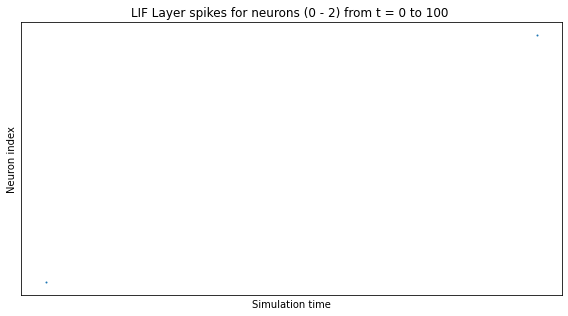

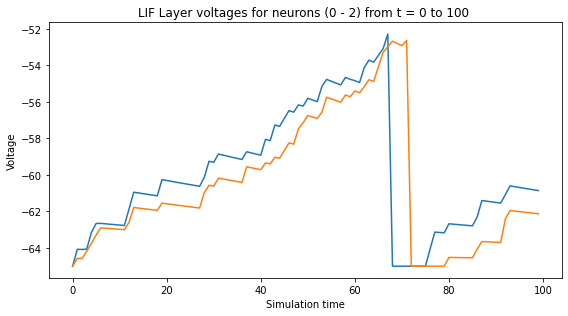

In [80]:
network = Network()

input_layer = Input(n=4)
lif_layer = LIFNodes(n=2)

time = 100

connection = Connection(
    source=input_layer, target=lif_layer
)

# Create a monitor.
lif_layer_monitor = Monitor(
    obj=lif_layer,
    state_vars=("s", "v"),  # Record spikes and voltages.
    time=time,  # Length of simulation (if known ahead of time).
)

# add layers to network
network.add_layer(
    layer=input_layer, name="Input Layer"
)
network.add_layer(
    layer=lif_layer, name="LIF Layer"
)

# add connection to network
network.add_connection(
    connection=connection, source="Input Layer", target="LIF Layer"
)

# add monitor to the network
network.add_monitor(monitor=lif_layer_monitor, name="LIF Layer")

# Create input spike data, where each spike is distributed according to Bernoulli(0.1).
input_data = torch.bernoulli(0.1 * torch.ones(time, input_layer.n)).byte()
inputs = {"Input Layer": input_data}

# Simulate network on input data.
network.run(inputs=inputs, time=time)

# Retrieve and plot simulation spike, voltage data from monitors.
spikes = {"LIF Layer": lif_layer_monitor.get("s")}
voltages = {"LIF Layer": lif_layer_monitor.get("v")}

plt.ioff()
plot_spikes(spikes)
plot_voltages(voltages, plot_type="line")
plt.show()